# Image classification - Kaggle

In [19]:
from fastai.vision import *
from fastai.metrics import accuracy
import time
print("Import of requried Pkgs - Done")

Import of requried Pkgs - Done


# Copy data from GDrive to Notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls drive/'My Drive'/images/

datakaggle.tar	sample_submission.csv  test  train


In [0]:
# !mkdir -p 'drive/data'  # error - mkdir: cannot create directory ‘drive/data’: Operation not supported
!mkdir -p data

In [20]:
start_time = time.time()
!cp -R drive/'My Drive'/images/datakaggle.tar data/
print("--- %s mins ---" % ((time.time() - start_time)/60))

--- 0.22967031399408977 mins ---


In [0]:
!cp drive/'My Drive'/images/sample_submission.csv data/sample_submission.csv

In [40]:
!ls data

datakaggle.tar	sample_submission.csv  train


In [0]:
start_time = time.time()
!tar -xvf data/datakaggle.tar
print("--- %s mins ---" % ((time.time() - start_time)/60))

datakaggle/train/train/Edvard_Munch/Edvard_Munch_4.jpg
datakaggle/test/test/892dbf13-27d0-443e-a6e3-c0b81f2c0c57.jpg
datakaggle/train/train/Hieronymus_Bosch/Hieronymus_Bosch_85.jpg
datakaggle/test/test/726377f4-0f12-4205-a5c1-507dba76254b.jpg
datakaggle/train/train/Francisco_Goya/Francisco_Goya_228.jpg
datakaggle/test/test/a501b83c-e241-4611-92ae-9767b49e8be1.jpg
datakaggle/train/train/Mikhail_Vrubel/Mikhail_Vrubel_110.jpg
datakaggle/train/train/Pierre-Auguste_Renoir/Pierre-Auguste_Renoir_12.jpg
datakaggle/train/train/Paul_Gauguin/Paul_Gauguin_175.jpg
datakaggle/train/train/Titian/Titian_39.jpg
datakaggle/train/train/Alfred_Sisley/Alfred_Sisley_174.jpg
datakaggle/test/test/60471e18-bed5-4cf6-9df6-a241bacabb44.jpg
datakaggle/test/test/e771d39a-11ff-41ff-9e73-841e32dca11f.jpg
datakaggle/train/train/Vincent_van_Gogh/Vincent_van_Gogh_439.jpg
datakaggle/train/train/Rembrandt/Rembrandt_218.jpg
datakaggle/train/train/Leonardo_da_Vinci/Leonardo_da_Vinci_131.jpg
datakaggle/train/train/Jan_van_E

In [0]:
help(fit_one_cycle)

Help on function fit_one_cycle in module fastai.train:

fit_one_cycle(learn:fastai.basic_train.Learner, cyc_len:int, max_lr:Union[float, Collection[float], slice]=slice(None, 0.003, None), moms:Tuple[float, float]=(0.95, 0.85), div_factor:float=25.0, pct_start:float=0.3, final_div:float=None, wd:float=None, callbacks:Union[Collection[fastai.callback.Callback], NoneType]=None, tot_epochs:int=None, start_epoch:int=None) -> None
    Fit a model following the 1cycle policy.



## Data

In [0]:
# # Copy for FastAI
# !mkdir -p data
# !cp -R ../input/dsnet-kaggledays-hackathon/train/train data/train
# # !cp -R ../input/dsnet-kaggledays-hackathon/test/test data/test
# !cp ../input/dsnet-kaggledays-hackathon/sample_submission.csv data/sample_submission.csv

In [21]:
!ls datakaggle

sample_submission.csv  test  train


In [24]:
DATA_DIR = Path('datakaggle')
print("Data Dir(DATA_DIR): ", DATA_DIR)

Data Dir(DATA_DIR):  datakaggle


In [0]:
?Path

In [26]:
DATA_DIR/'train'

PosixPath('datakaggle/train')

In [0]:
bs = 64

In [0]:
data = ImageDataBunch.from_folder(DATA_DIR, valid_pct=0.2, ds_tfms=get_transforms(flip_vert="True"), bs=180, size=64)
print("ImageDataBunch - Done")

In [0]:
?get_tranforms()

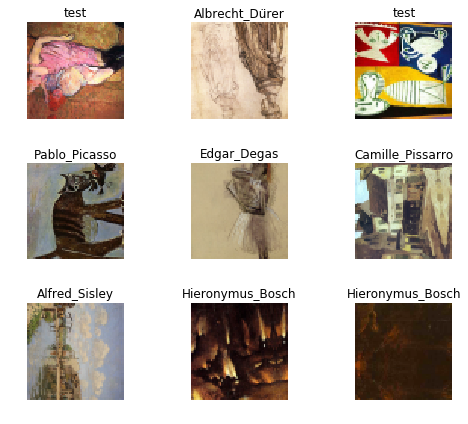

In [29]:
data.show_batch(rows=3, figsize=(7,6))

## Model

In [81]:
learn = cnn_learner(data, models.resnet50, pretrained=True, metrics=error_rate)
print("Learn - Done")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 78263259.86it/s]


Learn - Done


In [83]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [84]:
start_time = time.time()
learn.lr_find()
print("--- %s mins ---" % ((time.time() - start_time)/60))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
--- 7.177485664685567 mins ---


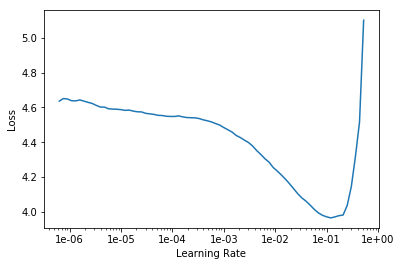

In [85]:
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(4, 3e-3)

In [0]:
learn.fit_one_cycle(4, 1e-01)

epoch,train_loss,valid_loss,error_rate,time
0,3.533036,6.726232,0.840606,03:34
1,3.520714,4.100000,0.886667,03:33
2,3.278603,2.888453,0.790303,03:33


In [0]:
# learn.fit_one_cycle(20)

In [0]:
# Save the model
learn.save('simple-model')

In [0]:
# Load the model
learn.load('simple-model');

In [0]:
# !cp -R ../input/dsnet-kaggledays-hackathon/test/test data/test

## Inference

In [73]:
# Load submission file
sample_df = pd.read_csv(DATA_DIR/'sample_submission.csv')
sample_df.head()

,id,predicted_class
0,43de3c52-a0df-40fa-b10f-8d0db8c6ed36.jpg,Vincent_van_Gogh
1,501f0f8e-5bd2-465d-8774-ee14b8fc293e.jpg,Vincent_van_Gogh
2,164eb34f-31b9-42de-b3a8-4d75fd88558f.jpg,Vincent_van_Gogh
3,484857c2-534b-4099-814f-c66d64c06351.jpg,Vincent_van_Gogh
4,f656d82e-c9e7-436d-b7c6-4c33aab35ddf.jpg,Vincent_van_Gogh


In [0]:
# Generate test predictions
learn.data.add_test(ImageList.from_df(sample_df,DATA_DIR,folder='test/test'))

In [0]:
# Load up submission file
preds,y = learn.get_preds(DatasetType.Test)

In [76]:
# Convert predictions to classes
pred_classes = [data.classes[c] for c in list(preds.argmax(dim=1).numpy())]
pred_classes[:10]

['test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'Vincent_van_Gogh',
 'Rembrandt',
 'test']

In [77]:
# Add the prediction
sample_df.predicted_class = pred_classes
sample_df.head()

,id,predicted_class
0,43de3c52-a0df-40fa-b10f-8d0db8c6ed36.jpg,test
1,501f0f8e-5bd2-465d-8774-ee14b8fc293e.jpg,test
2,164eb34f-31b9-42de-b3a8-4d75fd88558f.jpg,test
3,484857c2-534b-4099-814f-c66d64c06351.jpg,test
4,f656d82e-c9e7-436d-b7c6-4c33aab35ddf.jpg,test


In [78]:
# Save the submission file
sample_df.to_csv('submission2.csv',index=False)

from IPython.display import FileLink
FileLink('submission2.csv')

/content/submission2.csv

In [79]:
# Clean up (for commit)
!cp -R data/models models # Move the models out
!rm -rf data # Delete the data

cp: cannot stat 'data/models': No such file or directory
